In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *


#My image
file_path = 'Dropbox Files/hel1.pma'
image_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Chanel image paths
CH1_img_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

# Poly Mapping
CH1_peaks_10 = np.array([[55,63], [14, 194], [179, 45], [115, 172], [273, 65], [257, 192], [358, 91], [365, 199], [419, 44], [445, 205]])
CH2_peaks_10 = np.array([[60, 322], [18, 453], [183, 304], [119, 431], [276, 323], [258, 450], [359, 350], [364, 456], [420, 301], [446, 462]])

params_x_man_10, params_y_man_10 = find_polyfit_params(CH1_peaks_10, CH2_peaks_10, degree=3)
mapped_peaks_10 = apply_polyfit_params(good_peaks_1, params_x_man_10, params_y_man_10).astype(np.uint16)
poly_pair_count_tol4_10, poly_pair_arr_CH1_tol4_10, poly_pair_arr_CH2_tol4_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=4)


In [2]:
def draw_circle(radius, y_centre, x_centre, background_dim):

    diameter = 2 * radius + 1
    circle_array = np.zeros((background_dim, background_dim), dtype=np.uint8)
    

    # Midpoint circle algorithm
    x = radius
    y = 0
    p = 1 - radius
    
    while x >= y:
        circle_array[x_centre + x, y_centre + y] = 255
        circle_array[x_centre - x, y_centre + y] = 255
        circle_array[x_centre + x, y_centre - y] = 255
        circle_array[x_centre - x, y_centre - y] = 255
        circle_array[x_centre + y, y_centre + x] = 255
        circle_array[x_centre - y, y_centre + x] = 255
        circle_array[x_centre + y, y_centre - x] = 255
        circle_array[x_centre - y, y_centre - x] = 255
        
        y += 1
        if p <= 0:
            p = p + 2 * y + 1
        else:
            x -= 1
            p = p + 2 * y - 2 * x + 1
    
    return circle_array

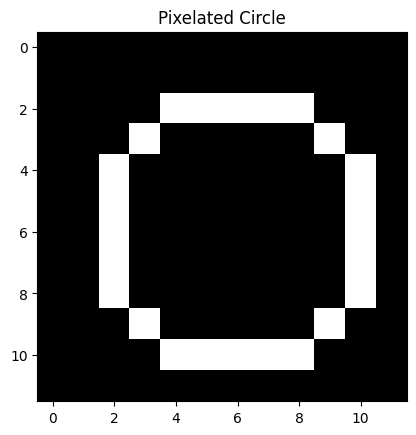

Maximum element value in total_arr:255.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 255. 255. 255. 255. 255.   0.   0.   0.]
 [  0.   0.   0. 255.   0.   0.   0.   0.   0. 255.   0.   0.]
 [  0.   0. 255.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0.   0. 255.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0.   0. 255.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0.   0. 255.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0.   0. 255.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0.   0.   0. 255.   0.   0.   0.   0.   0. 255.   0.   0.]
 [  0.   0.   0.   0. 255. 255. 255. 255. 255.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [3]:
radius = 4
background_dim= 12
circle_array = draw_circle(radius, 6, 6, background_dim)

# Display the circle using matplotlib
background = np.zeros((background_dim, background_dim))
total_arr = np.add(background, circle_array)
plt.imshow(total_arr, cmap='gray')
plt.title('Pixelated Circle')
plt.show()

print(f"Maximum element value in total_arr:{np.max(total_arr)}")
print(total_arr)


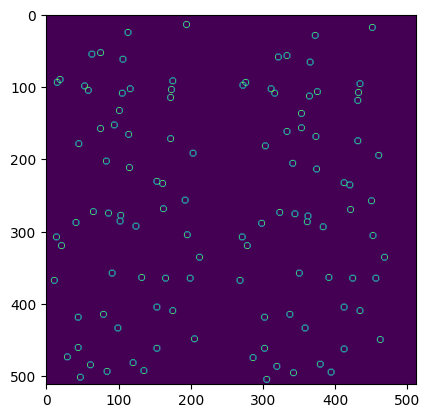

In [7]:
circle_array_CH1 = draw_circle(4, poly_pair_arr_CH1_tol4_10[:,1], poly_pair_arr_CH1_tol4_10[:,0], image.shape[0])
circle_array_CH2 = draw_circle(4, poly_pair_arr_CH2_tol4_10[:,1], poly_pair_arr_CH2_tol4_10[:,0], image.shape[0])

all_arr = np.add(circle_array_CH1, circle_array_CH2)
# all_arr = np.add(all_arr, image)
# all_arr_norm = all_arr/np.max(all_arr)

plt.imshow(all_arr)
# plt.imshow(image, cmap='gray')
plt.show()
# #Interactive Plots
# fig = plt.figure(figsize=(8, 8))
# ax = fig.subplots()
# ax.imshow(image, cmap='gray')
# ax.imshow(circle_array_CH1, cmap='Reds', alpha=0.5)
# ax.imshow(circle_array_CH2, cmap='Blues', alpha=0.5)
# ax.set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_10} pairs)")
# ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.06))

# plt.show()
